In [21]:
import membed
import numpy as np

In [2]:
%matplotlib inline

In [3]:
from matplotlib import pyplot as plt

In [4]:
import biom
from pathlib import Path

In [5]:
data_dir = Path('../tests/data')

In [39]:
ag = biom.load_table(data_dir / 'AGP-full.biom')
fid = ag.ids('observation')
ag

41588 x 28743 <class 'biom.table.Table'> with 4932532 nonzero entries (0% dense)

In [40]:
ag = biom.load_table(data_dir / 'AGP-noblank.biom')
ag

40950 x 28082 <class 'biom.table.Table'> with 4850848 nonzero entries (0% dense)

In [8]:
singleton = ag.sum(axis='observation') < 2
singleton.sum()

2900

In [9]:
ag.filter(fid[singleton], invert=True, axis='observation')

38050 x 28082 <class 'biom.table.Table'> with 4847948 nonzero entries (0% dense)

In [10]:
ag.remove_empty()

38050 x 28082 <class 'biom.table.Table'> with 4847948 nonzero entries (0% dense)

In [182]:
with biom.util.biom_open('../tests/data/AGP-ready.biom', 'w') as f:
    ag.to_hdf5(f, 'removed blank samples and singleton features')

In [32]:
ag = biom.load_table(data_dir / 'AGP-ready.biom')
fid = ag.ids('observation')
ag

38050 x 28082 <class 'biom.table.Table'> with 4847948 nonzero entries (0% dense)

In [44]:
f, s = ag.shape

In [45]:
print('density:', np.sum(ag.matrix_data!=0) / (f * s))

density: 0.004537067669574021


In [46]:
ag.ids('sample')

array(['10317.000001000', '10317.000001002', '10317.000001004', ...,
       '10317.X00229110', '10317.X00229111', '10317.X00229112'],
      dtype=object)

# filter low prevalence ASVs 

In [7]:
dir(ag)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_axis_to_num',
 '_cast_metadata',
 '_conv_to_self_type',
 '_data',
 '_data_equality',
 '_extract_data_from_tsv',
 '_fast_merge',
 '_get_col',
 '_get_row',
 '_get_sparse_data',
 '_index',
 '_index_ids',
 '_intersect_id_order',
 '_invert_axis',
 '_iter_obs',
 '_iter_samp',
 '_obs_index',
 '_observation_group_metadata',
 '_observation_ids',
 '_observation_metadata',
 '_sample_group_metadata',
 '_sample_ids',
 '_sample_index',
 '_sample_metadata',
 '_to_dense',
 '_to_sparse',
 '_union_id_order',
 'add_group_metadata',
 'add_metadata',
 'align_to',
 'collapse',
 'concat',
 'copy',
 'create_date',


In [24]:
prevalence = ag.nonzero_counts(axis='observation')

In [25]:
preval_rate = prevalence / ag.shape[0]

In [29]:
np.sum(prevalence == 1), np.sum(prevalence > 1)

(9287, 28763)

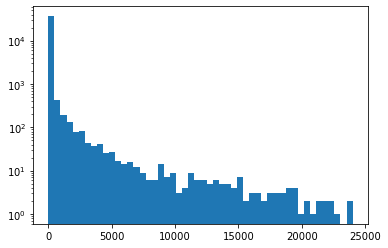

In [27]:
plt.hist(prevalence, bins=50, log=True);

In [33]:
ag.filter(fid[prevalence > 1], axis='observation')

28763 x 28082 <class 'biom.table.Table'> with 4838661 nonzero entries (0% dense)

In [35]:
ag.remove_empty()

28763 x 28082 <class 'biom.table.Table'> with 4838661 nonzero entries (0% dense)

In [36]:
with biom.util.biom_open('../tests/data/AGP-ready-preval.1.biom', 'w') as f:
    ag.to_hdf5(f, 'removed blank samples and singleton or low prevalence features')

# subsample AGP table to smaller size

In [58]:
np.logspace(np.log10(700), np.log10(f), 5, endpoint=False, dtype=int)

array([  700,  1556,  3460,  7695, 17112])

### subsample in log scale

In [62]:
for fi, si in zip(np.logspace(np.log2(700), np.log2(f), 5, base=2, endpoint=False, dtype=int), 
                  np.logspace(np.log2(2000), np.log2(s), 5, base=2, endpoint=False, dtype=int)):
    print(f'--- subsample feature size: {fi}, sample size: {si}')
    size = fi * si / (f * s)
    print('proportion to the original size:', size)
    agsub = ag.subsample(si, axis='sample', by_id=True, with_replacement=False).subsample(fi, axis='observation', by_id=True, with_replacement=False)
    print(repr(agsub))
    fi, si = agsub.shape
    outpath = data_dir / f'AGP_{size:.3f}_{fi}x{si}.biom'
    print('save subsampled table:', outpath, '\n')
    with biom.util.biom_open(str(outpath), 'w') as out:
        agsub.to_hdf5(out, 'subsampled from AGP')

--- subsample feature size: 700, sample size: 2000
proportion to the original size: 0.0013102233640714853
700 x 1992 <class 'biom.table.Table'> with 18823 nonzero entries (1% dense)
save subsampled table: ../tests/data/AGP_0.001_700x1992.biom 

--- subsample feature size: 1556, sample size: 3392
proportion to the original size: 0.004939497160605589
1556 x 3380 <class 'biom.table.Table'> with 57691 nonzero entries (1% dense)
save subsampled table: ../tests/data/AGP_0.005_1556x3380.biom 

--- subsample feature size: 3460, sample size: 5754
proportion to the original size: 0.018632162371114966
3460 x 5753 <class 'biom.table.Table'> with 148620 nonzero entries (0% dense)
save subsampled table: ../tests/data/AGP_0.019_3460x5753.biom 

--- subsample feature size: 7695, sample size: 9760
proportion to the original size: 0.07028711954038114
7695 x 9757 <class 'biom.table.Table'> with 427833 nonzero entries (0% dense)
save subsampled table: ../tests/data/AGP_0.070_7695x9757.biom 

--- subsample

### subsample in linear scale

In [49]:
for fi, si in zip(np.linspace(700, f, 5, endpoint=False, dtype=int), np.linspace(2000, s, 5, endpoint=False, dtype=int)):
    print(f'--- subsample feature size: {fi}, sample size: {si}')
    size = fi * si / (f * s)
    print('proportion to the original size:', size)
    agsub = ag.subsample(si, axis='sample', by_id=True, with_replacement=False).subsample(fi, axis='observation', by_id=True, with_replacement=False)
    print(repr(agsub))
    fi, si = agsub.shape
    outpath = data_dir / f'AGP_{size:.3f}_{si}x{fi}.biom'
    print('save subsampled table:', outpath, '\n')
    with biom.util.biom_open(str(outpath), 'w') as out:
        agsub.to_hdf5(out, 'subsampled from AGP')

--- subsample feature size: -9223372036854775808, sample size: -9223372036854775808
proportion to the original size: 0.0


/Users/zech/miniconda3/envs/membed/lib/python3.9/site-packages/numpy/core/function_base.py:278: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y).astype(dtype, copy=False)
/var/folders/2x/jz5qtn5922lfzcnmjfd4hfwm0000gn/T/ipykernel_76972/1406443589.py:3: RuntimeWarning: overflow encountered in long_scalars
  size = fi * si / (f * s)


ValueError: n cannot be negative.

# benchmark time usage

In [69]:
from sklearn.metrics import pairwise_distances_chunked, pairwise_distances

In [94]:
from scipy.sparse import coo_array

In [118]:
from joblib import Parallel, delayed
import time

In [104]:
data = biom.load_table('../tests/data/AGP_0.005_1556x3380.biom').matrix_data

In [ ]:
data2 = biom.load_table('../tests/data/AGP_0.001_700x1992.biom').matrix_data

In [120]:
%timeit Parallel(n_jobs=1)(delayed(slow_mean)(data, sl) for sl in slices)

4.2 s ± 96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [92]:
def reduce_func(D_chunk, start):
    print(f'create dist chunk with shape {D_chunk.shape}, starting at row {start}.')
    return coo_array(D_chunk)

In [114]:
%timeit list(pairwise_distances_chunked(data, metric=cooccur_abund, reduce_func=reduce_func, n_jobs=1))

create dist chunk with shape (1556, 1556), starting at row 0.
create dist chunk with shape (1556, 1556), starting at row 0.
create dist chunk with shape (1556, 1556), starting at row 0.
create dist chunk with shape (1556, 1556), starting at row 0.
create dist chunk with shape (1556, 1556), starting at row 0.
create dist chunk with shape (1556, 1556), starting at row 0.
create dist chunk with shape (1556, 1556), starting at row 0.
create dist chunk with shape (1556, 1556), starting at row 0.
28.4 s ± 451 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [98]:
%timeit list(pairwise_distances_chunked(data, metric=cooccur_abund, reduce_func=reduce_func, n_jobs=-1))

create dist chunk with shape (700, 700), starting at row 0.
create dist chunk with shape (700, 700), starting at row 0.
create dist chunk with shape (700, 700), starting at row 0.
create dist chunk with shape (700, 700), starting at row 0.
create dist chunk with shape (700, 700), starting at row 0.
create dist chunk with shape (700, 700), starting at row 0.
create dist chunk with shape (700, 700), starting at row 0.
create dist chunk with shape (700, 700), starting at row 0.
32 s ± 6.77 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [110]:
%timeit pairwise_distances(data, metric=foo, n_jobs=1)

80.7 ms ± 8.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [113]:
%timeit pairwise_distances(data, metric=foo, n_jobs=2)

KeyboardInterrupt: 

In [16]:
from membed.glove import cooccur_abund_sparse, cooccur_abund

/Users/zech/miniconda3/envs/membed/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
u = ag[0,:]
v = ag[1,:]
u, v

(<1x28082 sparse matrix of type '<class 'numpy.float64'>'
 	with 4 stored elements in Compressed Sparse Row format>,
 <1x28082 sparse matrix of type '<class 'numpy.float64'>'
 	with 1 stored elements in Compressed Sparse Row format>)

In [17]:
%timeit cooccur_abund_sparse(u, v)

145 µs ± 6.23 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [18]:
ud = u.toarray()[0]
vd = v.toarray()[0]
%timeit cooccur_abund(ud, vd)

118 µs ± 1.9 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [38]:
%timeit np.minimum(ud, vd)

32.7 µs ± 91.7 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [20]:
%timeit 1-np.abs(ud - vd)

45.2 µs ± 1.45 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [36]:
uvd = np.vstack([ud,vd])
%timeit uvd.min(axis=0)

45.4 µs ± 269 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [37]:
uvd.min(axis=0)

array([0., 0., 0., ..., 0., 0., 0.])

## plot pairwise features 

In [14]:
from shenshang.visualize import plot_joint_scatter

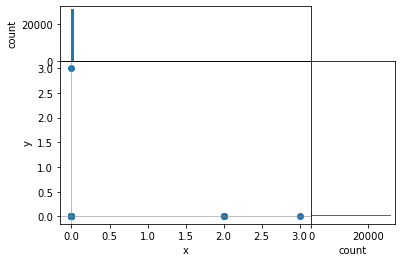

In [22]:
plot_joint_scatter(ud, vd);

In [26]:
from scipy.stats import hmean
hmean(ud[ud>0])

2.181818181818182

In [30]:
x=np.load('../hmean.npy', allow_pickle=True)

In [31]:
x

array(<8877x8877 sparse matrix of type '<class 'numpy.float64'>'
	with 78801129 stored elements in COOrdinate format>, dtype=object)

In [ ]:
hmean

In [25]:
ud.sum()

9.0

## other formulas 

In [184]:
aglog = ag.transform(f=lambda x, _, __: np.log2(x), inplace=False)

In [185]:
aglog

38050 x 28082 <class 'biom.table.Table'> with 4636966 nonzero entries (0% dense)

17339 8499
[0. 0. 0. ... 0. 0. 0.]


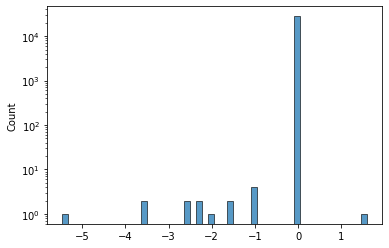

4369 33963
[0. 0. 0. ... 0. 0. 0.]


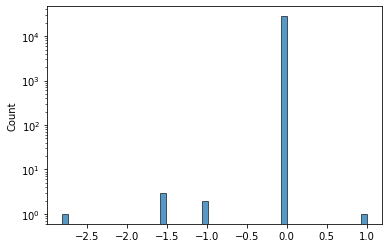

10152 12494
[0. 0. 0. ... 0. 0. 0.]


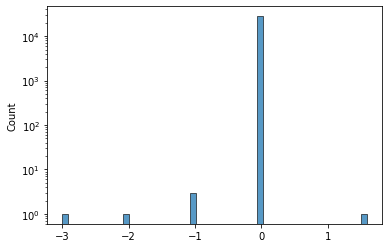

17233 29095
[0. 0. 0. ... 0. 0. 0.]


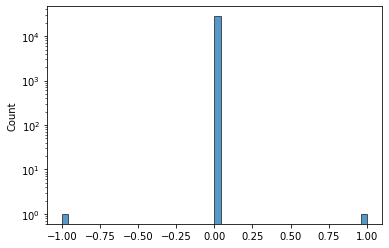

10003 3769
[0. 0. 0. ... 0. 0. 0.]


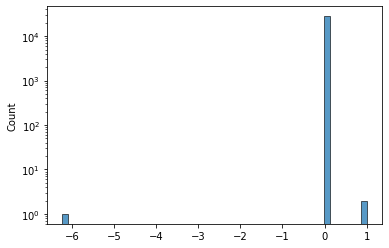

19097 14329
[0. 0. 0. ... 0. 0. 0.]


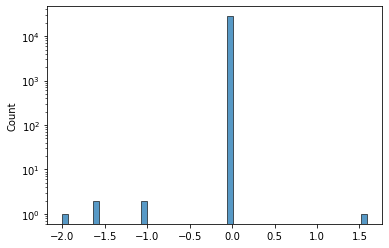

9080 29945
[0. 0. 0. ... 0. 0. 0.]


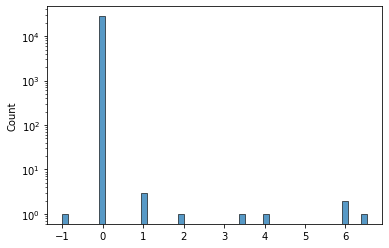

453 1222
[0. 0. 0. ... 0. 0. 0.]


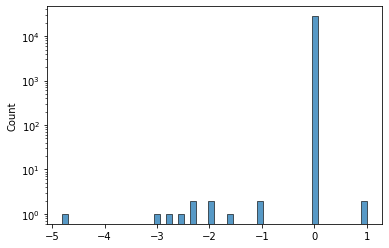

10662 32442
[0. 0. 0. ... 0. 0. 0.]


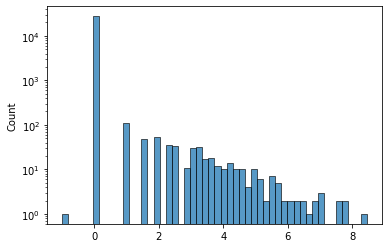

20023 35111
[0. 0. 0. ... 0. 0. 0.]


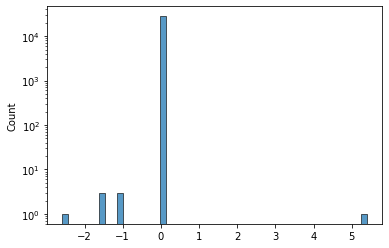

In [216]:
for i in range(10):
    i, j = np.random.randint(0, aglog.shape[0], 2)
    print(i,j)
    u = aglog[i,:]
    v = aglog[j,:]
    u, v
    ud = u.toarray()[0]
    vd = v.toarray()[0]
    print(ud-vd)
    sns.histplot(ud-vd, bins=50, log_scale=(False, True))
    plt.show()

In [186]:
u = aglog[6,:]
v = aglog[9,:]
u, v

(<1x28082 sparse matrix of type '<class 'numpy.float64'>'
 	with 7 stored elements in Compressed Sparse Row format>,
 <1x28082 sparse matrix of type '<class 'numpy.float64'>'
 	with 2 stored elements in Compressed Sparse Row format>)

In [187]:
ud = u.toarray()[0]
vd = v.toarray()[0]

In [195]:
import seaborn as sns

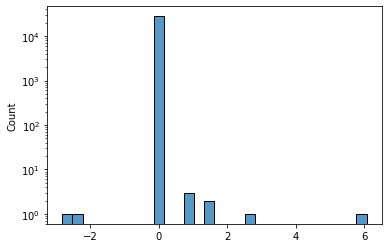

In [203]:
sns.histplot(ud-vd, bins=30, log_scale=(False, True));

In [ ]:
def cooccur1(u, v):
    (u-v)

In [100]:
from scipy.stats import gmean
%timeit gmean(ud)

/Users/zech/miniconda3/envs/membed/lib/python3.9/site-packages/scipy/stats/_stats_py.py:287: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


200 µs ± 5.96 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [101]:
%timeit np.prod(ud)**(1.0/len(ud))

58.7 µs ± 612 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## convert to boolean

In [18]:
%timeit ag.matrix_data > 0

12.9 ms ± 163 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%timeit ag.matrix_data.astype(bool)

10.4 ms ± 23 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# playground

In [52]:
biom.parse_table?

Signature: biom.parse_table(file_obj, ids=None, axis='sample', input_is_dense=False)
Docstring:
Parses the biom table stored in `file_obj`

Parameters
----------
file_obj : file-like object, or list
    file-like object storing the BIOM table (tab-delimited or JSON), or
    a list of lines of the BIOM table in tab-delimited or JSON format
ids : iterable
    The sample/observation ids of the samples/observations that we need
    to retrieve from the biom table
axis : {'sample', 'observation'}, optional
    The axis to subset on
input_is_dense : boolean
    Indicates if the BIOM table is dense or sparse. Valid only for JSON
    tables.

Returns
-------
Table
    The BIOM table stored at file_obj

Raises
------
ValueError
    If `samples` and `observations` are provided.

Notes
-----
Subsetting from the BIOM table is only supported in one axis

Examples
--------
Parse a hdf5 biom table

>>> from h5py import File # doctest: +SKIP
>>> from biom.parse import parse_biom_table
>>> f = File('ri

In [49]:
from sklearn.metrics.pairwise import PAIRWISE_DISTANCE_FUNCTIONS, distance_metrics

In [51]:
PAIRWISE_DISTANCE_FUNCTIONS

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features=True)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features=True)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features=True)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

In [50]:
distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features=True)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features=True)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features=True)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

In [20]:
t = biom.load_table(data_dir / 'test.biom')

In [21]:
d = t.matrix_data
d.toarray()

array([[0. , 0.2, 0. ],
       [0.3, 0. , 0.3],
       [0.2, 0.4, 0.1],
       [0.5, 0.4, 0.6]])

In [23]:
np.dot(d.toarray(), d.toarray().T)

array([[0.04, 0.  , 0.08, 0.08],
       [0.  , 0.18, 0.09, 0.33],
       [0.08, 0.09, 0.21, 0.32],
       [0.08, 0.33, 0.32, 0.77]])

In [31]:
x = np.dot(d, d.T)
x.setdiag(0)
x.toarray()

array([[0.  , 0.  , 0.08, 0.08],
       [0.  , 0.  , 0.09, 0.33],
       [0.08, 0.09, 0.  , 0.32],
       [0.08, 0.33, 0.32, 0.  ]])

In [ ]:
np.dot(d, d.T)

In [33]:
x.toarray().setdiag(0)

AttributeError: 'numpy.ndarray' object has no attribute 'setdiag'

In [35]:
from scipy.sparse import issparse
issparse(x)

True